<a href="https://colab.research.google.com/github/emiraydn21/Python/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle Giriş Dizini Dosyalarını Listeleme ve CIFAR-10 Veri Kümesinin Kütüphaneleri İmport Etme**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd

**CIFAR-10 Veri Kümesini Yükleme ve yüklenen veri kümesi hakkında bazı bilgiler**

In [2]:
# Veri kümesini yükleme
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

# Yüklenen verileri kontrol etme
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


**CIFAR-10 Veri Kümesinden Rastgele Resimleri Gösterme**

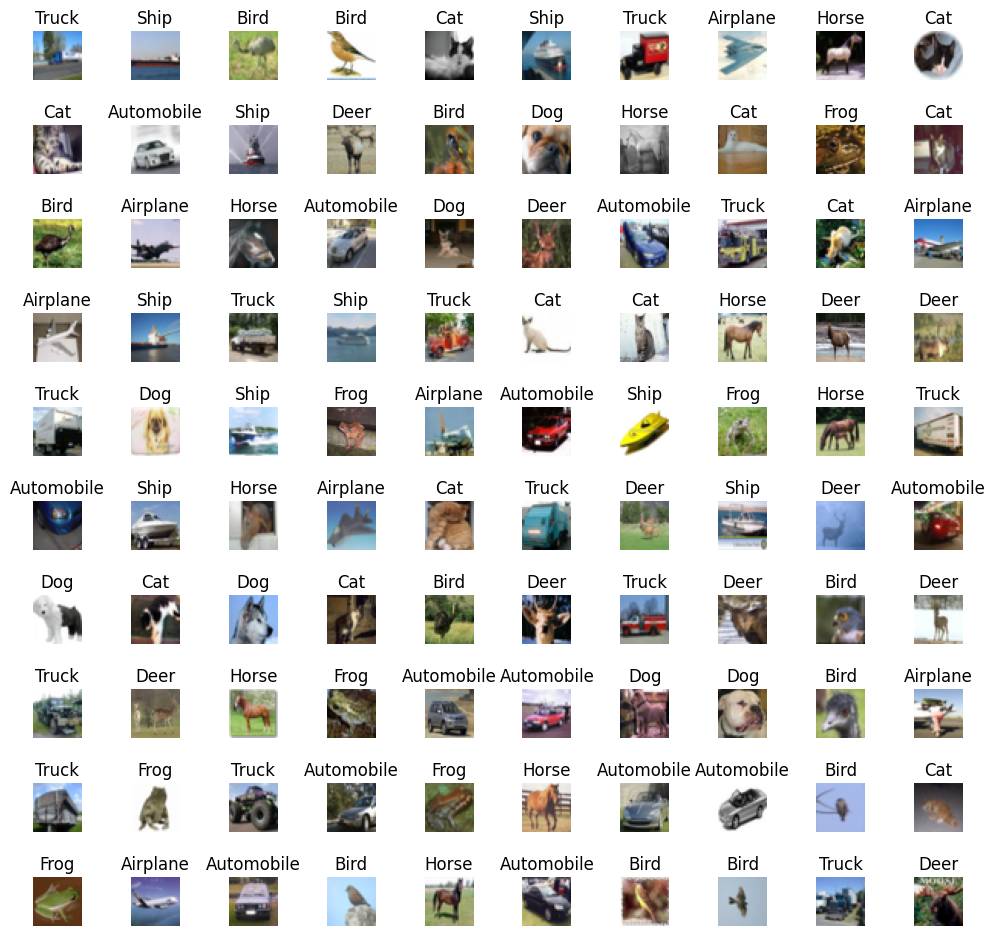

In [3]:
# Rastgele resimleri ve etiketleri gösterme

def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)

**Seaborn ile Veri Görselleştirme**

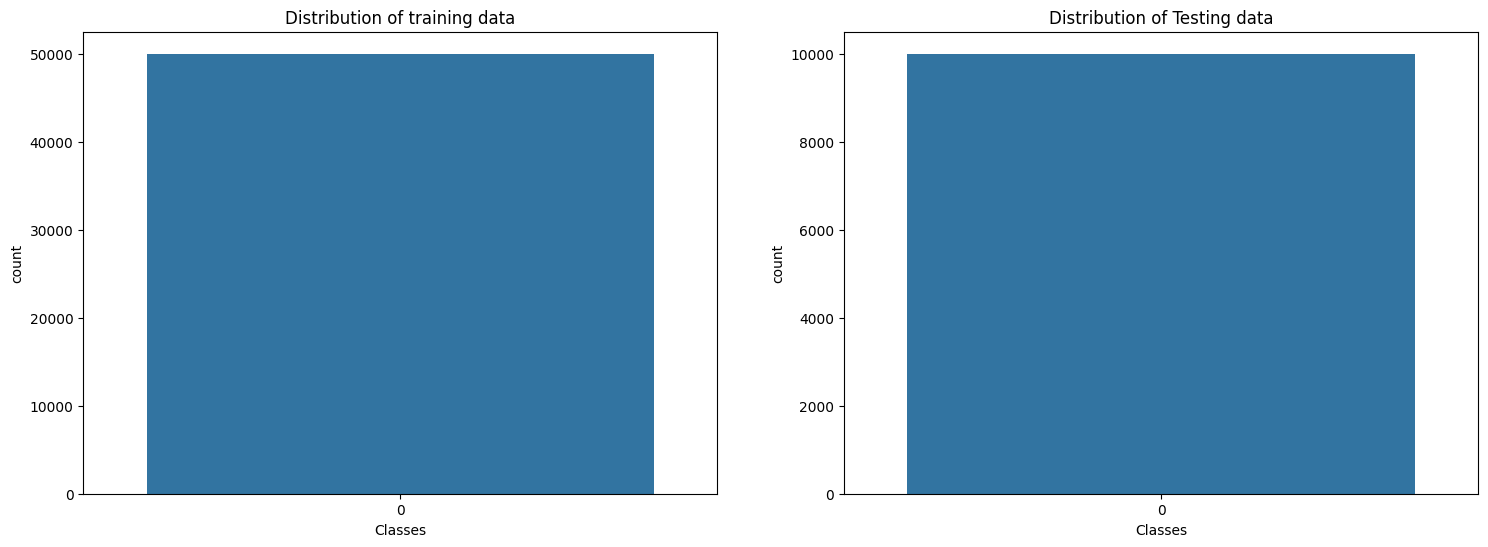

In [4]:
# Seaborn ile veri görselleştirme
# Eğitim ve test veri setinde sınıf sayısı

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bu bölüm, Seaborn'u kullanarak eğitim ve test kümesindeki sınıfların dağılımını gösteren sayım grafikleri oluşturur.
figure, axis = plt.subplots( 1, 2 , figsize = (18,6))
sns.countplot(y_train.ravel(),ax = axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')
# Test seti için sayım grafiği
sns.countplot(y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of Testing data')
axis[1].set_xlabel('Classes')
plt.show()

**Veri Ön İşleme yaparak görüntülerin piksel değerlerini ondalık sayılara dönüştürür ve [0, 1] aralığına normalize eder.**

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255
#keras.utils.to_cotegorical(y, num_of_classes) convert the label
#data into (m, num_of class) array from (m, 1) input
import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10) #as classes = 10
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('The one hot label is: ', y_train_one_hot[1])
print(y_train_one_hot.shape)

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(50000, 10)


**Modelin Hesaplamalı Grafiği Oluşturuluyor**

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# Modelin hesaplamalı grafiğini oluşturma

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))
#Parametreler ve katmanlar hakkında bilgiyi ekrana yazdır.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

**Modeli Derleme ve Eğitme**

In [7]:
#modeli kayıp, tercih ve ölçümlerle derleme
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)
#eğitim veri kümesi için modelin uyarlanması
hist = model.fit(x_train, y_train_one_hot, batch_size = 64 , epochs = 30, validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 234s 372ms/step - loss: 1.8788 - accuracy: 0.3002 - val_loss: 1.4277 - val_accuracy: 0.4793
Epoch 2/30
625/625 [==============================] - 234s 374ms/step - loss: 1.4515 - accuracy: 0.4742 - val_loss: 1.1757 - val_accuracy: 0.5774
Epoch 3/30
625/625 [==============================] - 235s 376ms/step - loss: 1.2678 - accuracy: 0.5457 - val_loss: 1.0364 - val_accuracy: 0.6312
Epoch 4/30
625/625 [==============================] - 235s 377ms/step - loss: 1.1628 - accuracy: 0.5843 - val_loss: 0.9729 - val_accuracy: 0.6535
Epoch 5/30
625/625 [==============================] - 235s 377ms/step - loss: 1.0890 - accuracy: 0.6167 - val_loss: 0.9042 - val_accuracy: 0.6842
Epoch 6/30
625/625 [==============================] - 235s 375ms/step - loss: 1.0235 - accuracy: 0.6370 - val_loss: 0.8545 - val_accuracy: 0.6991
Epoch 7/30
625/625 [==============================] - 232s 371ms/step - loss: 0.9755 - accuracy: 0.6580 - val_loss: 0.8398 -

**Eğitim Geçmişini Çizme**

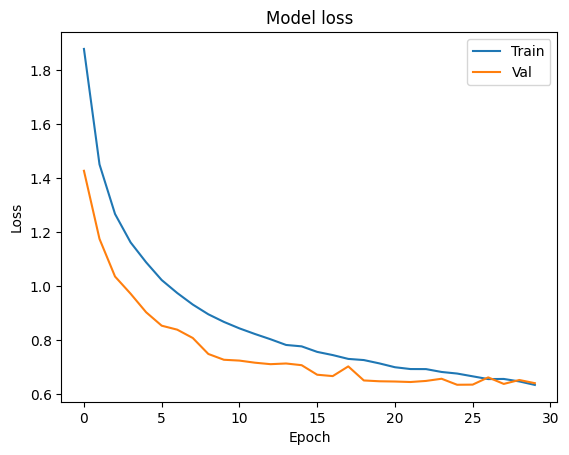

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Eğitim Geçmişini Çizme**

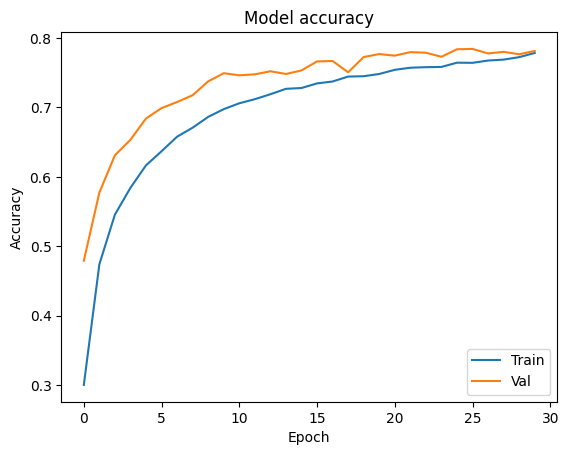

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Modeli Test Kümesinde Değerlendirme**

In [10]:
model.evaluate(x_test, y_test_one_hot)[1]


313/313 [==============================] - 15s 47ms/step - loss: 0.6621 - accuracy: 0.7739


0.7738999724388123